In [1]:
!pip install geoplot

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [3]:
df_ind = gpd.read_file("IDN_adm2.shp")
df_ind.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,106,IDN,Indonesia,1,Aceh,1,Aceh Barat Daya,Kabupaten,Regency,None,South West Aceh,"MULTIPOLYGON (((96.90573 3.60124, 96.90451 3.6..."
1,106,IDN,Indonesia,1,Aceh,2,Aceh Barat,Kabupaten,Regency,None,West Aceh,"POLYGON ((96.57126 4.57926, 96.56599 4.57711, ..."
2,106,IDN,Indonesia,1,Aceh,3,Aceh Besar,Kabupaten,Regency,None,None,"MULTIPOLYGON (((94.97379 5.78853, 94.97289 5.7..."
3,106,IDN,Indonesia,1,Aceh,4,Aceh Jaya,Kabupaten,Regency,None,None,"MULTIPOLYGON (((95.83961 4.40411, 95.83920 4.4..."
4,106,IDN,Indonesia,1,Aceh,5,Aceh Selatan,Kabupaten,Regency,None,South Aceh,"MULTIPOLYGON (((97.65528 2.60139, 97.65528 2.6..."


In [4]:
df_ind[df_ind['NAME_1'].str.contains('Jawa Barat')]

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
82,106,IDN,Indonesia,10,Jawa Barat,83,Bandung,Kabupaten,Regency,None,None,"POLYGON ((107.47384 -7.25082, 107.47252 -7.250..."
83,106,IDN,Indonesia,10,Jawa Barat,84,Banjar,Kotamadya,Municipality,None,Kota Banjar,"POLYGON ((108.65409 -7.34747, 108.65359 -7.351..."
84,106,IDN,Indonesia,10,Jawa Barat,85,Bekasi,Kabupaten,Regency,None,None,"MULTIPOLYGON (((106.98464 -6.37687, 106.99231 ..."
85,106,IDN,Indonesia,10,Jawa Barat,86,Bogor,Kabupaten,Regency,None,None,"POLYGON ((107.22392 -6.59998, 107.22263 -6.603..."
86,106,IDN,Indonesia,10,Jawa Barat,87,Ciamis,Kabupaten,Regency,None,None,"POLYGON ((108.66740 -7.72899, 108.66695 -7.729..."
87,106,IDN,Indonesia,10,Jawa Barat,88,Cianjur,Kabupaten,Regency,None,None,"MULTIPOLYGON (((107.02562 -7.44798, 107.02521 ..."
88,106,IDN,Indonesia,10,Jawa Barat,89,Cimahi,Kotamadya,Municipality,None,Kota Cimahi,"POLYGON ((107.57697 -6.88347, 107.57670 -6.884..."
89,106,IDN,Indonesia,10,Jawa Barat,90,Cirebon,Kabupaten,Regency,None,None,"MULTIPOLYGON (((108.76287 -6.81147, 108.76334 ..."
90,106,IDN,Indonesia,10,Jawa Barat,91,Depok,Kotamadya,Municipality,None,Kota Depok,"POLYGON ((106.90945 -6.37546, 106.90886 -6.376..."
91,106,IDN,Indonesia,10,Jawa Barat,92,Garut,Kabupaten,Regency,None,None,"MULTIPOLYGON (((107.83567 -7.72613, 107.83559 ..."


In [5]:
df_jabar = pd.read_csv("Data_COVID-19_Jawa_Barat.csv")
df_jabar.head(27)

,tanggal,kode_prov,nama_prov,kode_kab,nama_kab,closecontact,closecontact_dikarantina,closecontact_discarded,suspect,suspect_diisolasi,suspect_discarded,probable,probable_diisolasi,probable_discarded,probable_meninggal,confirmation,confirmation_selesai,confirmation_meninggal,pertumbuhan_closecontact,pertumbuhan_closecontact_discarded,pertumbuhan_closecontact_dikarantina,pertumbuhan_suspect,pertumbuhan_suspect_discarded,pertumbuhan_suspect_diisolasi,pertumbuhan_probable,pertumbuhan_probable_discarded,pertumbuhan_probable_diisolasi,pertumbuhan_probable_meninggal,pertumbuhan_confirmation,pertumbuhan_confirmation_selesai,pertumbuhan_confirmation_meninggal,Unnamed: 31
0,2020-08-01,32,Provinsi Jawa Barat,3201,KAB. BOGOR,0,0,0,0,0,0,0,0,0,0,493,176,11,0,0,0,0,0,0,0,0,0,0,4,0,0,NaN
1,2020-08-01,32,Provinsi Jawa Barat,3202,KAB. SUKABUMI,0,0,0,0,0,0,0,0,0,0,77,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
2,2020-08-01,32,Provinsi Jawa Barat,3203,KAB. CIANJUR,0,0,0,0,0,0,0,0,0,0,39,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,2020-08-01,32,Provinsi Jawa Barat,3204,KAB. BANDUNG,0,0,0,0,0,0,0,0,0,0,214,140,5,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
4,2020-08-01,32,Provinsi Jawa Barat,3205,KAB. GARUT,0,0,0,0,0,0,0,0,0,0,37,27,3,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,2020-08-01,32,Provinsi Jawa Barat,3206,KAB. TASIKMALAYA,0,0,0,0,0,0,0,0,0,0,18,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6,2020-08-01,32,Provinsi Jawa Barat,3207,KAB. CIAMIS,0,0,0,0,0,0,0,0,0,0,20,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,2020-08-01,32,Provinsi Jawa Barat,3208,KAB. KUNINGAN,0,0,0,0,0,0,0,0,0,0,49,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,2020-08-01,32,Provinsi Jawa Barat,3209,KAB. CIREBON,0,0,0,0,0,0,0,0,0,0,43,24,4,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,2020-08-01,32,Provinsi Jawa Barat,3210,KAB. MAJALENGKA,0,0,0,0,0,0,0,0,0,0,12,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [6]:
df_ind[df_ind['NAME_2'].str.contains('Banjar')].head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
83,106,IDN,Indonesia,10,Jawa Barat,84,Banjar,Kotamadya,Municipality,None,Kota Banjar,"POLYGON ((108.65409 -7.34747, 108.65359 -7.351..."
107,106,IDN,Indonesia,11,Jawa Tengah,108,Banjarnegara,Kabupaten,Regency,None,None,"POLYGON ((109.36527 -7.48715, 109.36636 -7.485..."
195,106,IDN,Indonesia,14,Kalimantan Selatan,196,Banjar Baru,Kotamadya,Municipality,None,Kota Banjar Baru|Bajarbaru,"POLYGON ((114.91276 -3.53821, 114.91122 -3.536..."
196,106,IDN,Indonesia,14,Kalimantan Selatan,197,Banjar,Kotamadya,Municipality,None,Kota Banjar,"POLYGON ((114.51278 -3.54225, 114.51278 -3.541..."
197,106,IDN,Indonesia,14,Kalimantan Selatan,198,Banjarmasin,Kotamadya,Municipality,None,Kota Banjarmasin,"POLYGON ((114.51195 -3.38666, 114.51339 -3.383..."


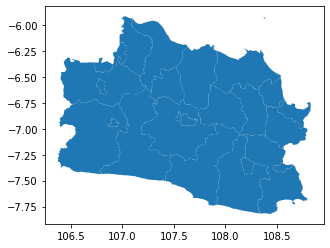

In [7]:
df_ind[df_ind['NAME_1'].str.contains('Jawa Barat')].plot()

In [8]:
len(df_jabar.groupby('nama_kab').sum())

28

In [9]:
df_jabar_replace = df_jabar.replace({
    'KAB. BOGOR': 'Bogor',
    'KAB. SUKABUMI': 'Sukabumi',
    'KAB. CIANJUR': 'Cianjur',
    'KAB. BANDUNG': 'Bandung',
    'KAB. GARUT': 'Garut',
    'KAB. TASIKMALAYA' : 'Tasikmalaya',
    'KAB. CIAMIS' : 'Ciamis',
    'KAB. KUNINGAN' : 'Kuningan',
    'KAB. CIREBON' : 'Cirebon',
    'KAB. MAJALENKA': 'Majalengka',
    'KAB. SUMENDANG' :'Sumedang',
    'KAB. INDRAMAYU' : 'Indramayu',
    'KAB. SUBANG' :'Subang',
    'KAB. PURWAKARTA' : 'Purwakarta',
    'KAB. KARAWANG' : 'Karawang',
    'KAB. BEKASI' : 'Bekasi',
    'KAB. BANDUNG BARAT' : 'Bandung Barat',
    'KAB. PANGANDARAN' : 'Pangandaran',
    'KAB. MAJALENGKA' : 'Majalengka',
    'KAB. SUMEDANG' : 'Sumedang',
    'KOTA BOGOR' : 'Kota Bogor',
    'KOTA SUKABUMI' : 'Kota Sukabumi',
    'KOTA BANDUNG' : 'Kota Bandung',
    'KOTA CIREBON' : 'Kota Cirebon',
    'KOTA BEKASI' : 'Kota Bekasi',
    'KOTA DEPOK' : 'Depok',
    'KOTA CIMAHI' : 'Cimahi',
    'KOTA TASIKMALAYA' : 'Kota Tasikmalaya',
})

In [10]:
for i in range(len(df_jabar_replace.groupby('nama_kab').sum().index)):
  y = df_ind.groupby('NAME_2').sum().index
  x = df_jabar_replace.groupby('nama_kab').sum().index[i]
  a = x in y
  if not a:
    print('{} tidak terdapat pada kolom'.format(x))

BELUM TERIDENTIFIKASI tidak terdapat pada kolom
Bandung Barat tidak terdapat pada kolom
KOTA BANJAR tidak terdapat pada kolom
Pangandaran tidak terdapat pada kolom


In [11]:
df_jabar_replace.groupby('nama_kab').sum().index

Index(['BELUM TERIDENTIFIKASI', 'Bandung', 'Bandung Barat', 'Bekasi', 'Bogor',
       'Ciamis', 'Cianjur', 'Cimahi', 'Cirebon', 'Depok', 'Garut', 'Indramayu',
       'KOTA BANJAR', 'Karawang', 'Kota Bandung', 'Kota Bekasi', 'Kota Bogor',
       'Kota Cirebon', 'Kota Sukabumi', 'Kota Tasikmalaya', 'Kuningan',
       'Majalengka', 'Pangandaran', 'Purwakarta', 'Subang', 'Sukabumi',
       'Sumedang', 'Tasikmalaya'],
      dtype='object', name='nama_kab')

In [12]:
df_jabar_replace.head()

,tanggal,kode_prov,nama_prov,kode_kab,nama_kab,closecontact,closecontact_dikarantina,closecontact_discarded,suspect,suspect_diisolasi,suspect_discarded,probable,probable_diisolasi,probable_discarded,probable_meninggal,confirmation,confirmation_selesai,confirmation_meninggal,pertumbuhan_closecontact,pertumbuhan_closecontact_discarded,pertumbuhan_closecontact_dikarantina,pertumbuhan_suspect,pertumbuhan_suspect_discarded,pertumbuhan_suspect_diisolasi,pertumbuhan_probable,pertumbuhan_probable_discarded,pertumbuhan_probable_diisolasi,pertumbuhan_probable_meninggal,pertumbuhan_confirmation,pertumbuhan_confirmation_selesai,pertumbuhan_confirmation_meninggal,Unnamed: 31
0,2020-08-01,32,Provinsi Jawa Barat,3201,Bogor,0,0,0,0,0,0,0,0,0,0,493,176,11,0,0,0,0,0,0,0,0,0,0,4,0,0,NaN
1,2020-08-01,32,Provinsi Jawa Barat,3202,Sukabumi,0,0,0,0,0,0,0,0,0,0,77,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
2,2020-08-01,32,Provinsi Jawa Barat,3203,Cianjur,0,0,0,0,0,0,0,0,0,0,39,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,2020-08-01,32,Provinsi Jawa Barat,3204,Bandung,0,0,0,0,0,0,0,0,0,0,214,140,5,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
4,2020-08-01,32,Provinsi Jawa Barat,3205,Garut,0,0,0,0,0,0,0,0,0,0,37,27,3,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [13]:
df_merge = df_ind.merge(df_jabar_replace,  left_on='NAME_2', right_on='nama_kab')
df_merge.tail()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,tanggal,kode_prov,nama_prov,kode_kab,nama_kab,closecontact,closecontact_dikarantina,closecontact_discarded,suspect,suspect_diisolasi,suspect_discarded,probable,probable_diisolasi,probable_discarded,probable_meninggal,confirmation,confirmation_selesai,confirmation_meninggal,pertumbuhan_closecontact,pertumbuhan_closecontact_discarded,pertumbuhan_closecontact_dikarantina,pertumbuhan_suspect,pertumbuhan_suspect_discarded,pertumbuhan_suspect_diisolasi,pertumbuhan_probable,pertumbuhan_probable_discarded,pertumbuhan_probable_diisolasi,pertumbuhan_probable_meninggal,pertumbuhan_confirmation,pertumbuhan_confirmation_selesai,pertumbuhan_confirmation_meninggal,Unnamed: 31
6667,106,IDN,Indonesia,10,Jawa Barat,107,Tasikmalaya,Kabupaten,Regency,None,None,"POLYGON ((108.30264 -7.81232, 108.30247 -7.812...",2021-05-01,32,Provinsi Jawa Barat,3206,Tasikmalaya,0,2117,-2117,0,1826,-1842,0,4,-13,9,2452,2041,60,0,0,0,0,0,0,0,0,0,0,9,13,0,NaN
6668,106,IDN,Indonesia,10,Jawa Barat,107,Tasikmalaya,Kabupaten,Regency,None,None,"POLYGON ((108.30264 -7.81232, 108.30247 -7.812...",2021-05-02,32,Provinsi Jawa Barat,3206,Tasikmalaya,0,2117,-2117,0,1826,-1842,0,4,-13,9,2465,2041,60,0,0,0,0,0,0,0,0,0,0,13,0,0,NaN
6669,106,IDN,Indonesia,10,Jawa Barat,107,Tasikmalaya,Kabupaten,Regency,None,None,"POLYGON ((108.30264 -7.81232, 108.30247 -7.812...",2021-05-03,32,Provinsi Jawa Barat,3206,Tasikmalaya,0,2117,-2117,0,1826,-1842,0,4,-13,9,2471,2057,60,0,0,0,0,0,0,0,0,0,0,6,16,0,NaN
6670,106,IDN,Indonesia,10,Jawa Barat,107,Tasikmalaya,Kabupaten,Regency,None,None,"POLYGON ((108.30264 -7.81232, 108.30247 -7.812...",2021-05-04,32,Provinsi Jawa Barat,3206,Tasikmalaya,0,2117,-2117,0,1826,-1842,0,4,-13,9,2471,2057,60,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6671,106,IDN,Indonesia,10,Jawa Barat,107,Tasikmalaya,Kabupaten,Regency,None,None,"POLYGON ((108.30264 -7.81232, 108.30247 -7.812...",2021-05-05,32,Provinsi Jawa Barat,3206,Tasikmalaya,0,2117,-2117,0,1826,-1842,0,4,-13,9,2471,2057,60,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


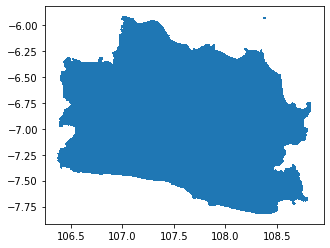

In [14]:
df_merge.plot()

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

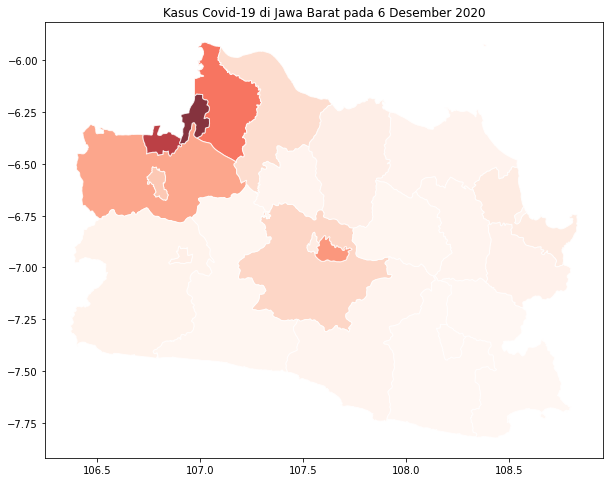

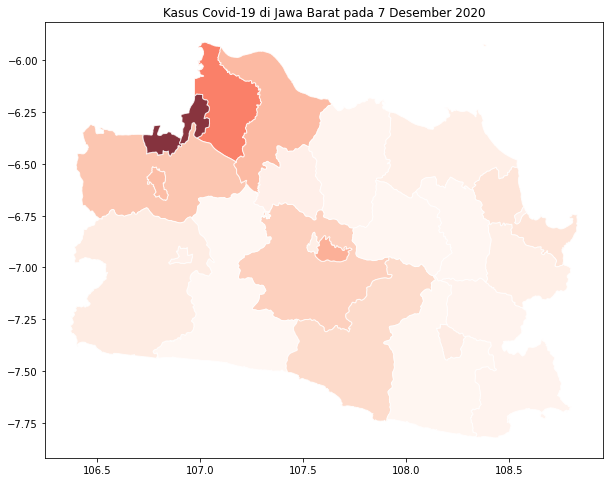

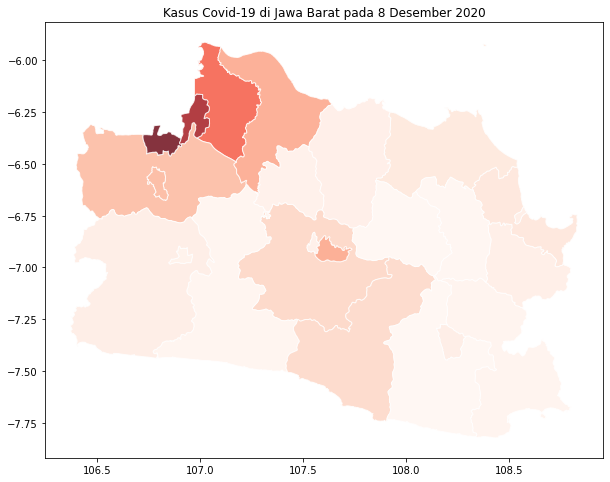

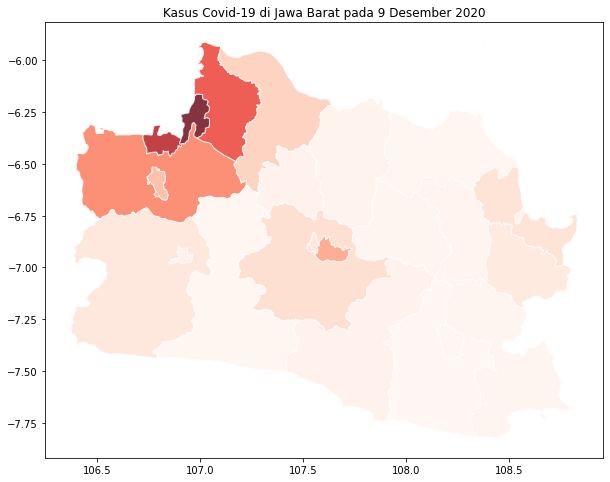

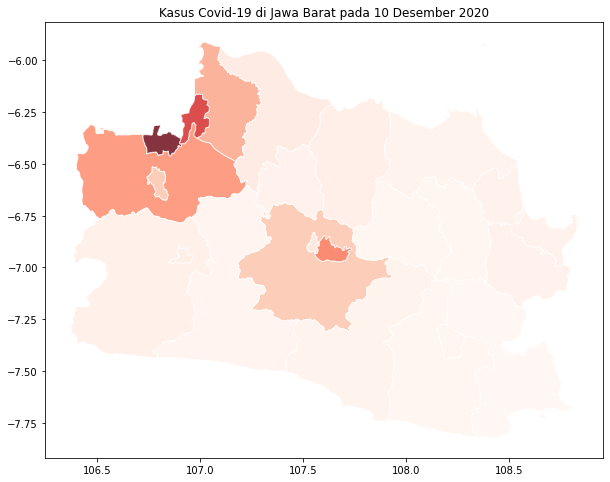

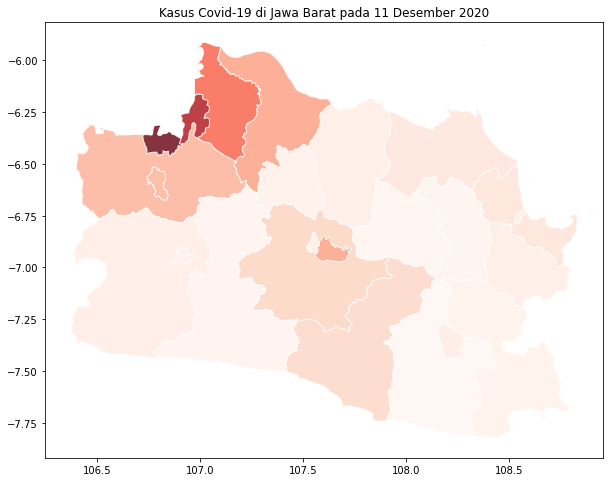

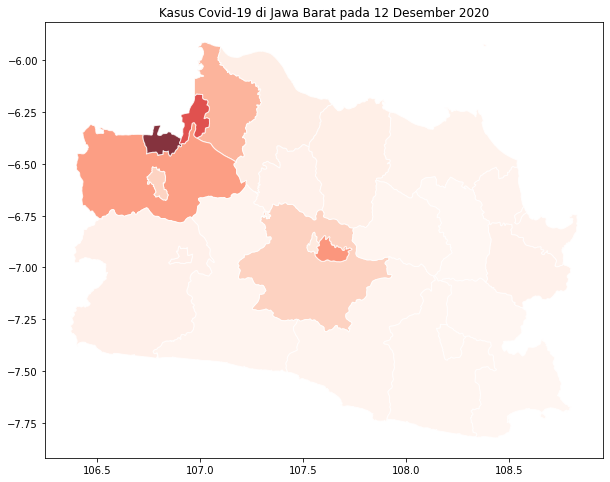

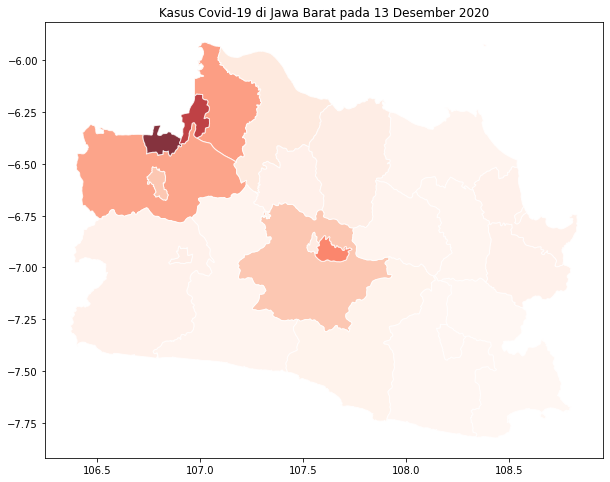

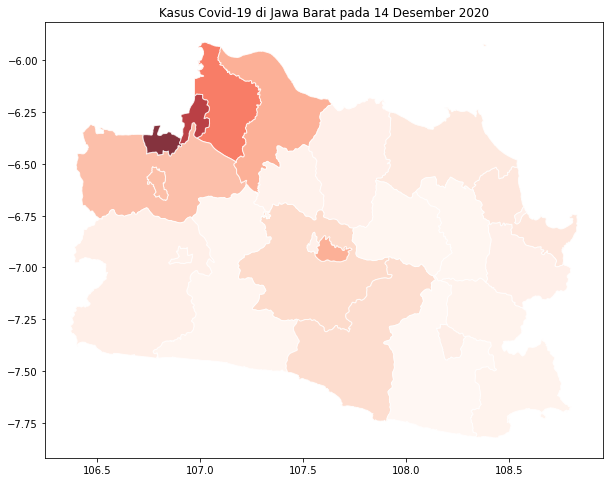

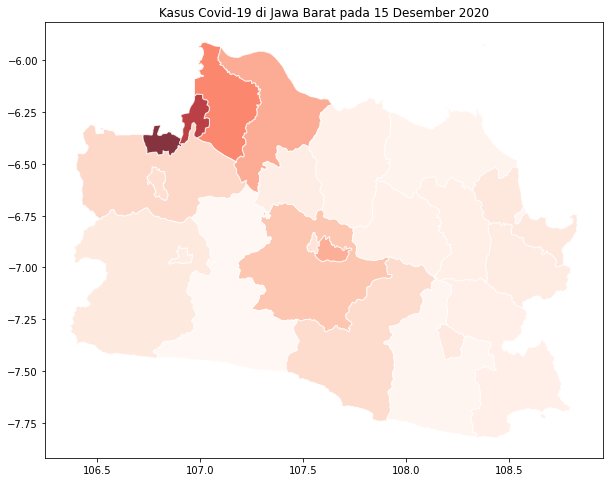

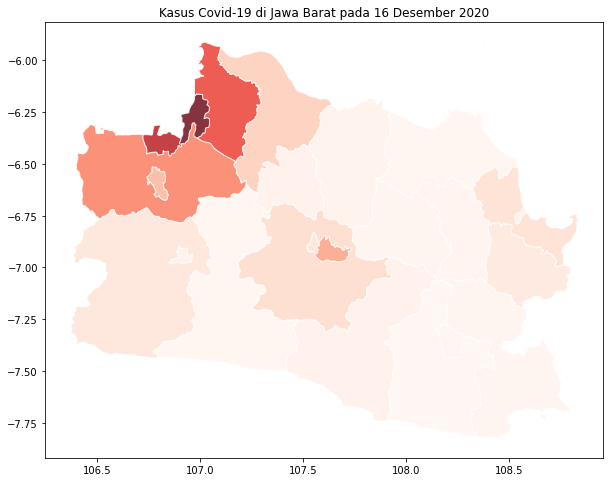

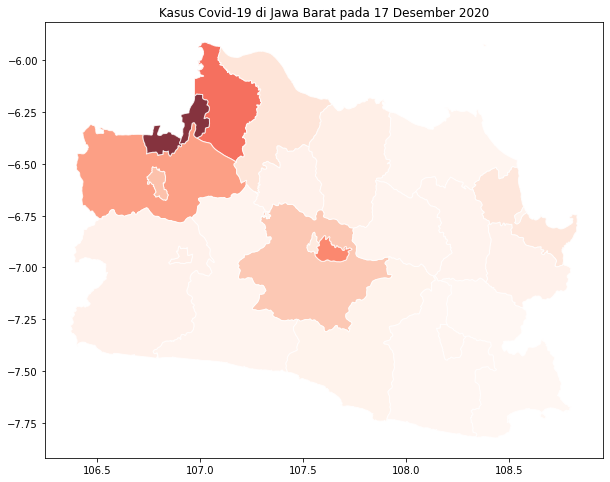

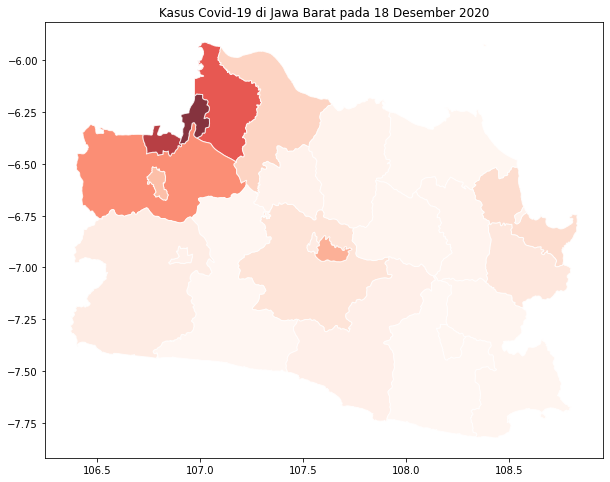

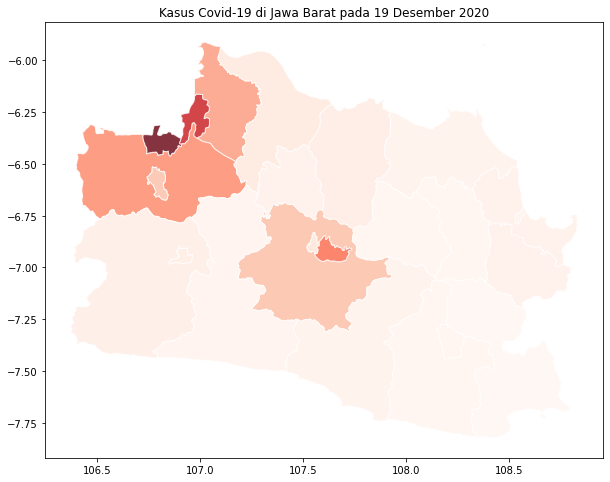

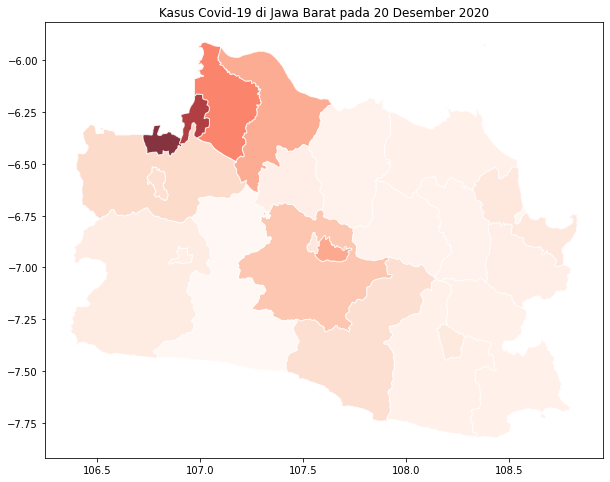

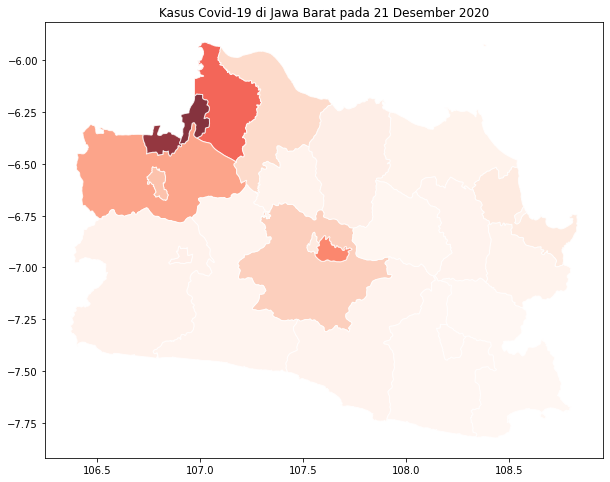

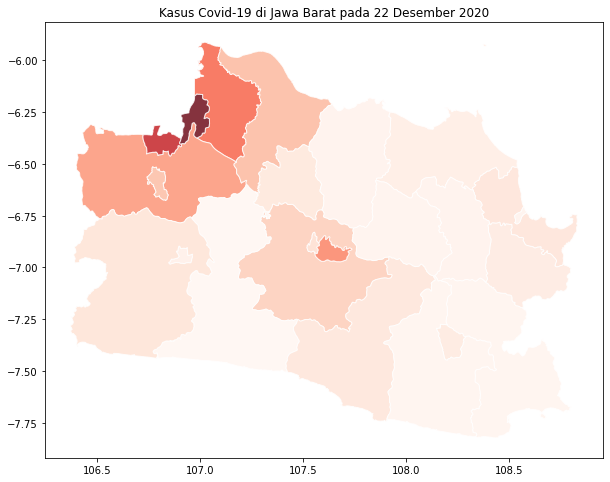

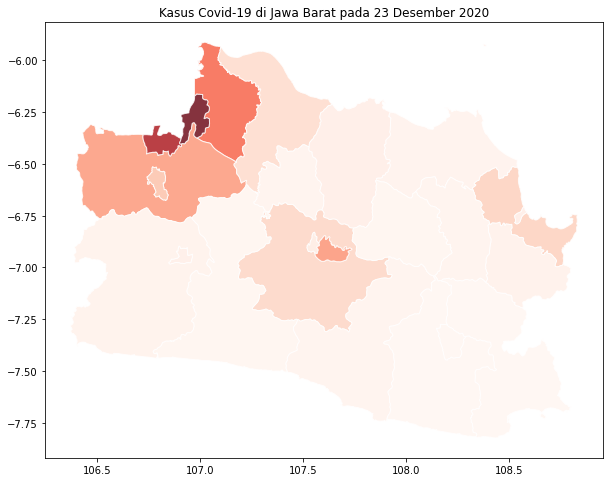

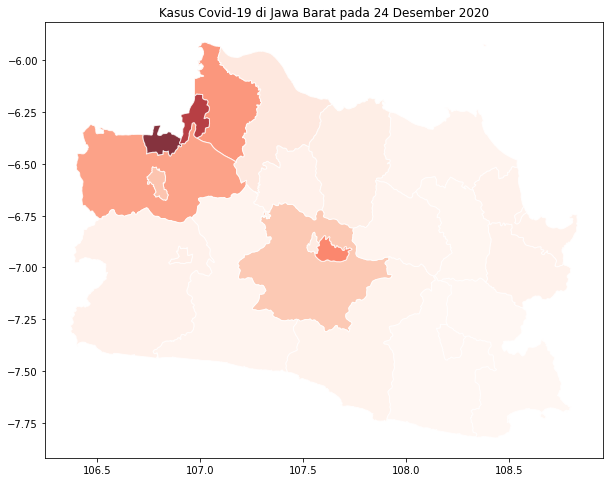

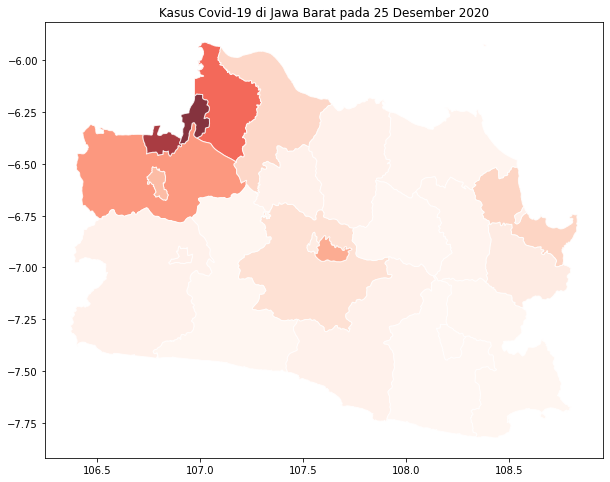

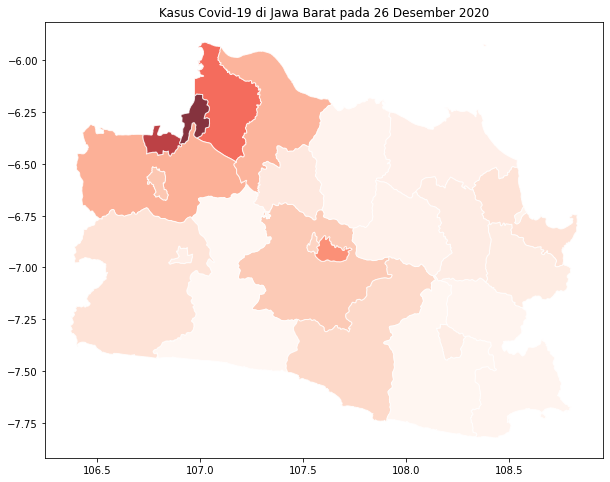

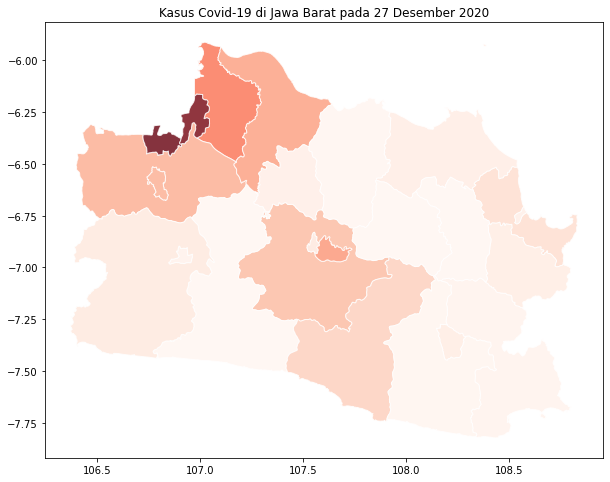

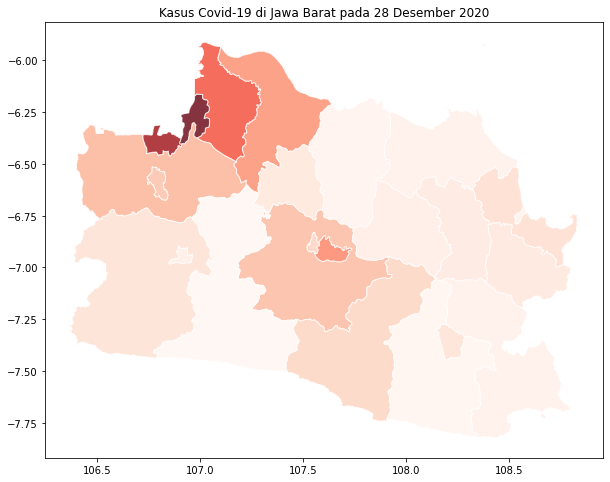

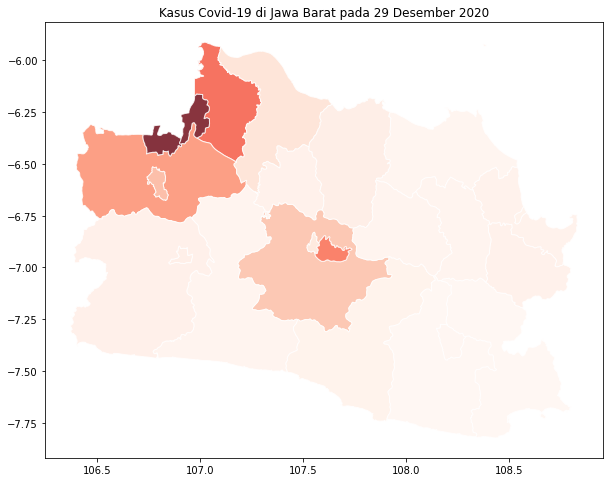

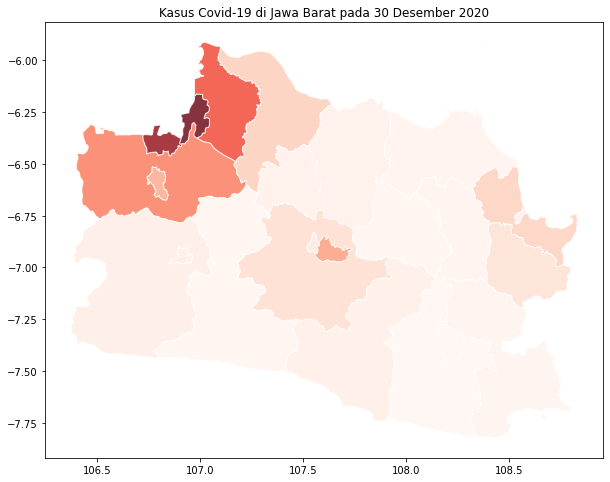

In [16]:
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)

tanggal = 5
image_files = []
dates = [i for i in set(df_merge['tanggal'])]

for i in range(25):
  df_merge[df_merge['tanggal'] == dates[i]].plot(
    figsize=(10, 15),
    column='confirmation',
    cmap='Reds',
    alpha=.8,
    edgecolor='white'
)

  tanggal += 1
  plt.title(f'Kasus Covid-19 di Jawa Barat pada {tanggal} Desember 2020')

  file_name = str(anim_path / "{}.png".format(tanggal))
  plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
  image_files.append(file_name)

In [17]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)

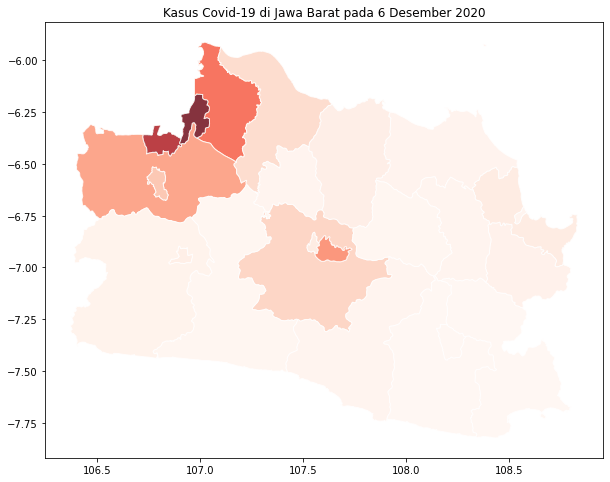

In [18]:
from IPython.display import Image

Image(open('movie.gif','rb').read())

## Sumber :
Download peta indonesia : https://www.diva-gis.org/gdata
<br>
Download dataset covid di jawa barat :